<a href="https://colab.research.google.com/github/katyalrajat/UTS_ML2019_ID13132903/blob/master/ML_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Github Link to Notebook and Dataset

Notebook:

Dataset:https://github.com/katyalrajat/UTS_ML2019_ID13132903/blob/master/diabetes.csv


### Introduction 

In this Notebook we will pick up a dataset of interest to expolore data analyis and Machine Learning. 

I hvae used the Prima Indian Diabetes dataset from the National Institute of Diabetes and Digestive and Kidney Diseases. The link to the dataset can be found in the refrence section.

The problem at hand is to be able to detect and predict weather a person has Diabetes or not, based on other available parameters like Body Mass Index, Insulin levels, etc. This is a classification problem and would require a machine learning model to predict Diabetes. 

Another interesting insight from this problem could be to see on which parameter does Diabetes depend the most.


#### Loading the data from local drive:

In [0]:
# Loading data from local drive

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving diabetes.csv to diabetes.csv
User uploaded file "diabetes.csv" with length 23875 bytes


In [0]:
import pandas as pd
df = pd.read_csv("diabetes.csv")

In [0]:
# Let's look at the data snippet
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Describe the data

Here we can see that there are 9 columns in the data. All columns seem to be numeric in nature which is good for modelling. In case of Character string columns, we could have used dummy numeric variables for modelling. The columns here are:

0. Number of times pregnant.
1. Plasma glucose concentration a 2 hours in an oral glucose tolerance test.
2. Diastolic blood pressure (mm Hg).
3. Triceps skinfold thickness (mm).
4. 2-Hour serum insulin (mu U/ml).
5. Body mass index (weight in kg/(height in m)^2).
6. Diabetes pedigree function.
7. Age (years).
8. Outcome: Class variable (0 or 1).

In [0]:
# Checking data tyoes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


All values seem to be in the integer or float format which is opt for modelling. 
Hence there is no type conversions required on the dataset. 
The row count of the data is 768. Hence the shape of our data is ***768 * 9***

In [0]:
# Checking for missing data

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Here we can see that there is no missing or Null values. But in the data head we had spotted a 0 value. 
Now we should check the data range nad basic summary statistics about our data.

In [0]:
# Checking data ranges and basic summary
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Missing Values

Here we can see certain columns have minimum value as 0 which is clearly not logical.
The columns are:

1. Glucose
2. Blood Pressure
3. Skin Thickness
4. Insulin
5. BMI

Next we need to check the amount of missing information in these columns. We can check this looking for the 0 valued rows.

In [0]:
# CHecking 0 value rows in specific columns

x = df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]] == 0
x = x.sum()
print(x)

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


Here we cans see that While Glucose BMI and BloodPressure have fewer missing values(0 values), Insulin and SkinThickness have a high missing values. 

### Treating missing data

For the Columns with fewer missing values (less than 50), we will use a common techniques to fill the data:
Fill missing values with column mean values

But with the 2 columns having high missing values (Insulin and SkinThickness), we could try 3 things: 

1. To remove those rows from the data thereby reducing the dataset 
2. Ignore those columns during modelling.
3. Try to fill the missing values with some logic




In [0]:
# change 0 values to NAN for fewer missing rows
import numpy as np

# Mark as Nan
df[["BloodPressure","Glucose","BMI"]] = df[["BloodPressure","Glucose","BMI"]].replace(0, np.NaN)
# fill missing values with mean column values
df.fillna(df.mean(), inplace=True)


In [0]:
# Checking the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,20.536458,79.799479,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,15.952218,115.244002,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,23.000000,30.500000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Here we can observe that the Columns - Glucose , BloodPressure and BMI no longer have 0 minimum values.

### Univariate Analysis

Now let's check the data distribution to decide how to treat Missing values for Insulin and SkinThickness.
Before that we need to mark the 0 values for those columns as NULL in order to not skew the data.

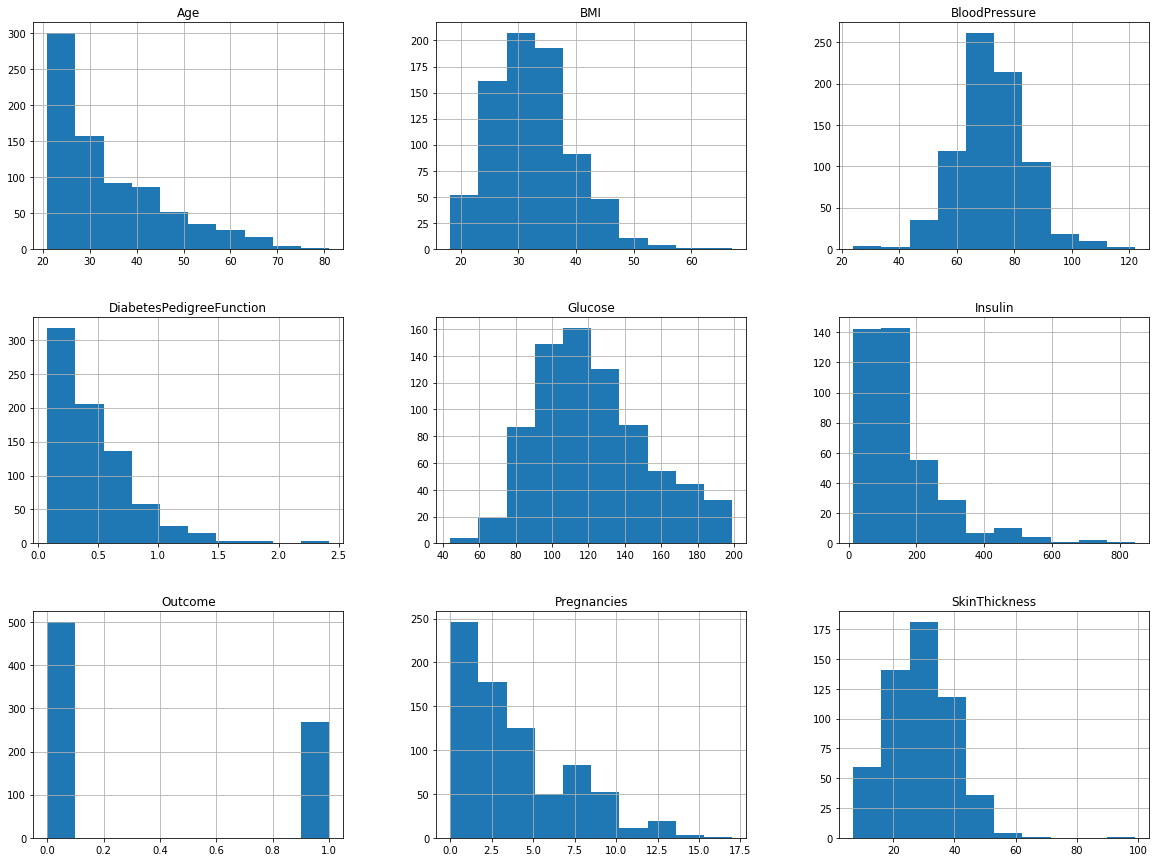

In [0]:
# Mark as Nan
df[["SkinThickness","Insulin"]] = df[["SkinThickness","Insulin"]].replace(0, np.NaN)

fig = df.hist(figsize = (20,15))


The **Skin thickness** has a somewhat normal distribution with a few possitive outliers. So in case of the skin thickness, we will replace the NA values with the median values. Other colums like **Glucose, BMI and BloodPressure** also have a somewhat normal distribution.


We can also see that **DiabetesPredigreeFunction , Insulin, Age and Pregnancies** have a rightward skew.
It is also interesting to see that our **Outcome** class has nearly double negative outcomes than possitive.

For **Insulin**, since we don't want to further skew the data distribution, we will ignore the missing data and remove those rows from our dataset. We also can try to fill it with other values like mean/median and compare our model accuracies.



In [0]:
# Creating a dataframe df1 with Median values of Skin thickness and median values of Insulin
df1 = df.copy()
df1['SkinThickness'].fillna(df1['SkinThickness'].median(), inplace=True)
df1['Insulin'].fillna(df1['Insulin'].median(), inplace=True)

# Creating a dataframe df2 with Median values for Skin Thickness but removing the missing data for Insulin
df2 = df.copy()
df2['SkinThickness'].fillna(df2['SkinThickness'].median(), inplace=True)
df2.dropna(inplace=True)

In [0]:
# Checking for Null Values in df1

df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null float64
BloodPressure               768 non-null float64
SkinThickness               768 non-null float64
Insulin                     768 non-null float64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [0]:
# Checking for Null Values in df2

df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 3 to 765
Data columns (total 9 columns):
Pregnancies                 394 non-null int64
Glucose                     394 non-null float64
BloodPressure               394 non-null float64
SkinThickness               394 non-null float64
Insulin                     394 non-null float64
BMI                         394 non-null float64
DiabetesPedigreeFunction    394 non-null float64
Age                         394 non-null int64
Outcome                     394 non-null int64
dtypes: float64(6), int64(3)
memory usage: 30.8 KB


### Data distributions after treating missing values : df1

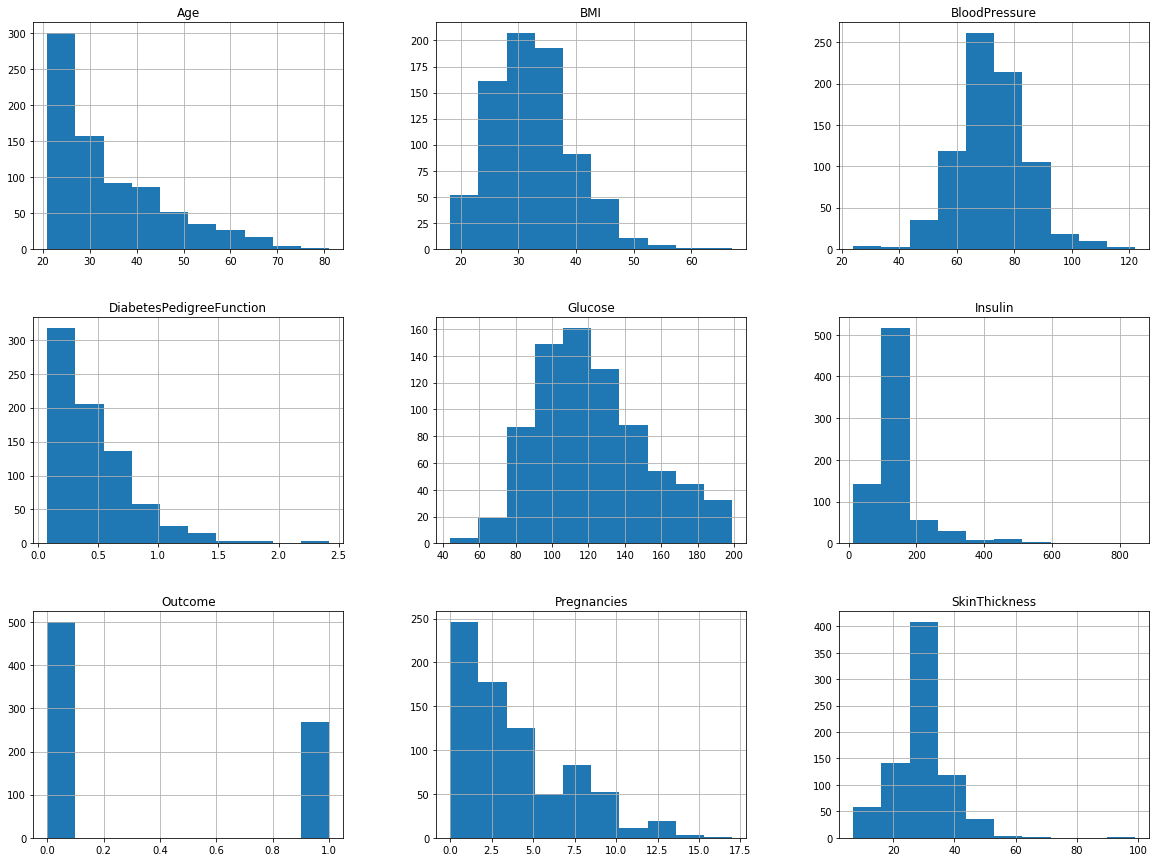

In [0]:
fig = df1.hist(figsize = (20,15))

We can see here that only the distributions for Insulin and SkinThickness have changed. We can see the data has been aligned more with the median values. Now, let's check the range of data using ***Box Plots:***

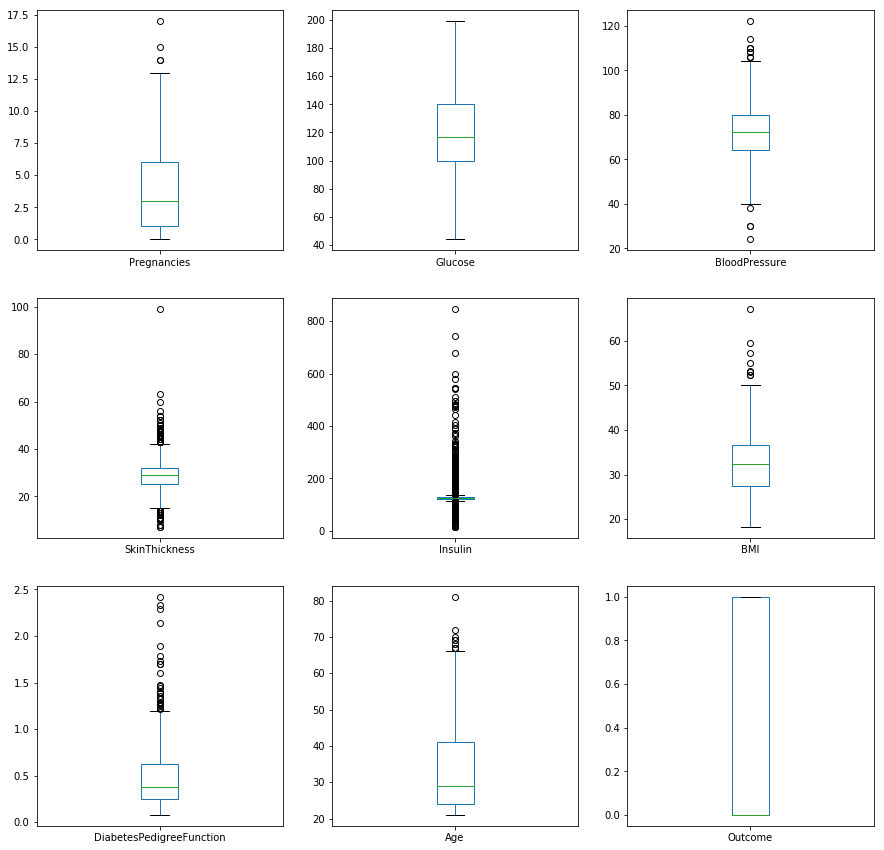

In [0]:
# Data Ranges

#plt.figure()
df1.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,15))
plt.show()

Here we could spot the range, average values and the outliers in the data columns.

### Bivariate Analysis

We would be analysing our Individual Variables with respect to the class outcome. That is:

1. Diabetic
2. Non-Diabetic

Here we would use our larger database -> Df1 for analysing all variables except for Insulin and SkinThickness, in which case we would use the Df2 which doesn't assume Insulin values.






In [0]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns





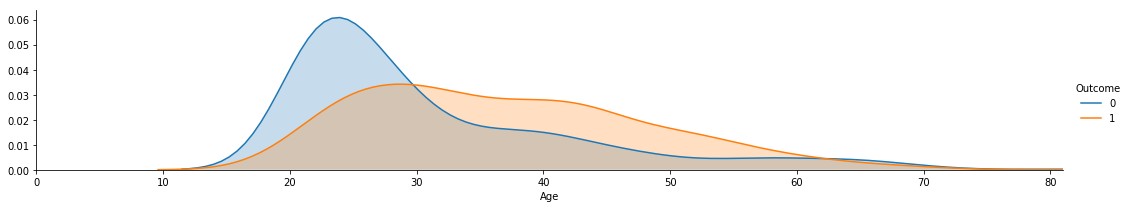

In [0]:
# Age Analysis

fig = sns.FacetGrid(df1, hue="Outcome", aspect =5)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = df1['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

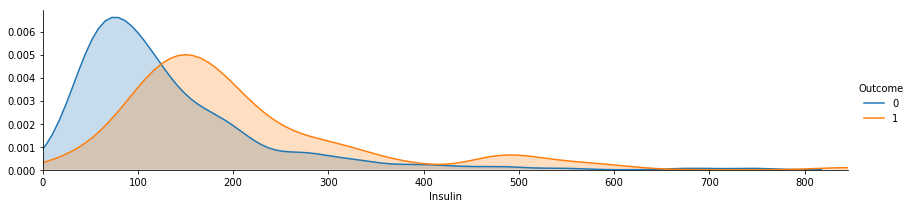

In [0]:
# Inslin

fig = sns.FacetGrid(df2, hue="Outcome", aspect=4)
fig.map(sns.kdeplot, 'Insulin', shade=True)
oldest = df2['Insulin'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

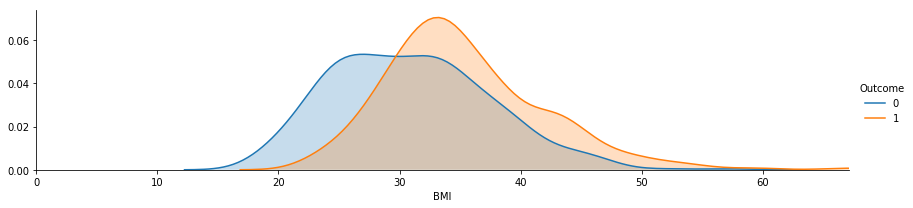

In [0]:
# BMI

fig = sns.FacetGrid(df1, hue="Outcome", aspect=4)
fig.map(sns.kdeplot, 'BMI', shade=True)
oldest = df1['BMI'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

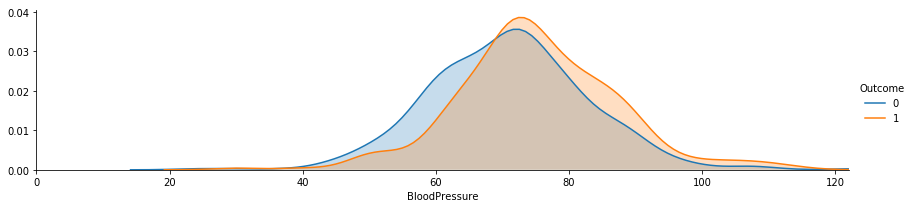

In [0]:
# Blood Pressure

fig = sns.FacetGrid(df1, hue="Outcome", aspect=4)
fig.map(sns.kdeplot, 'BloodPressure', shade=True)
oldest = df1['BloodPressure'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

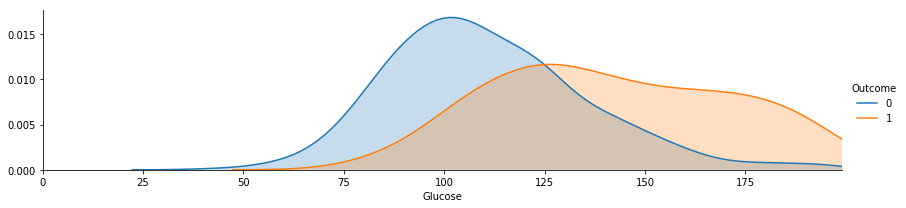

In [0]:
# Glucose

fig = sns.FacetGrid(df1, hue="Outcome", aspect=4)
fig.map(sns.kdeplot, 'Glucose', shade=True)
oldest = df1['Glucose'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

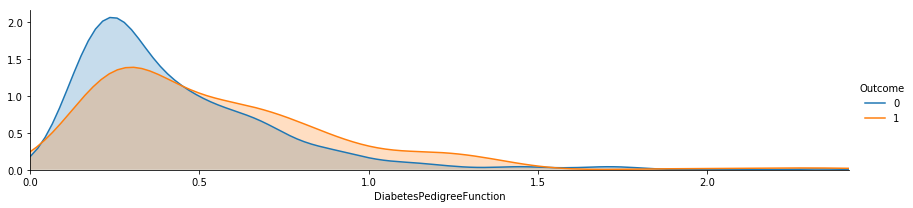

In [0]:
# Diabetes Pedigree Function

fig = sns.FacetGrid(df1, hue="Outcome", aspect=4)
fig.map(sns.kdeplot, 'DiabetesPedigreeFunction', shade=True)
oldest = df1['DiabetesPedigreeFunction'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

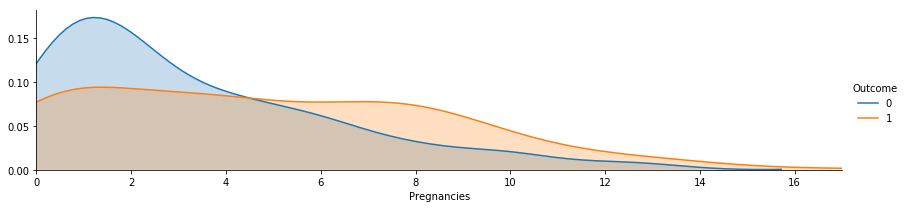

In [0]:
# Pregnancies

fig = sns.FacetGrid(df1, hue="Outcome", aspect=4)
fig.map(sns.kdeplot, 'Pregnancies', shade=True)
oldest = df1['Pregnancies'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

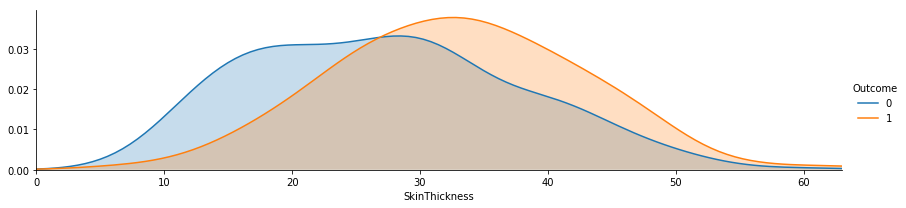

In [0]:
# SkinThickness

fig = sns.FacetGrid(df2, hue="Outcome", aspect=4)
fig.map(sns.kdeplot, 'SkinThickness', shade=True)
oldest = df2['SkinThickness'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

### Analysis Results:

From the ***Bi-variate Analysis*** we could conclude that certain parameters clearly stand out in Diabetics vs Non-Diabetics.
These were:

*   Age
*   Insulin
*   BMI
*   Glucose
*   Pregnancies

In these parameters, certain counts tend to be more in line with non-diabetics. For example, Diabetes is seen more as Age increses or Glucose level increases. These paramters would definitely help in classifying the model.


### Object Correlatoins :

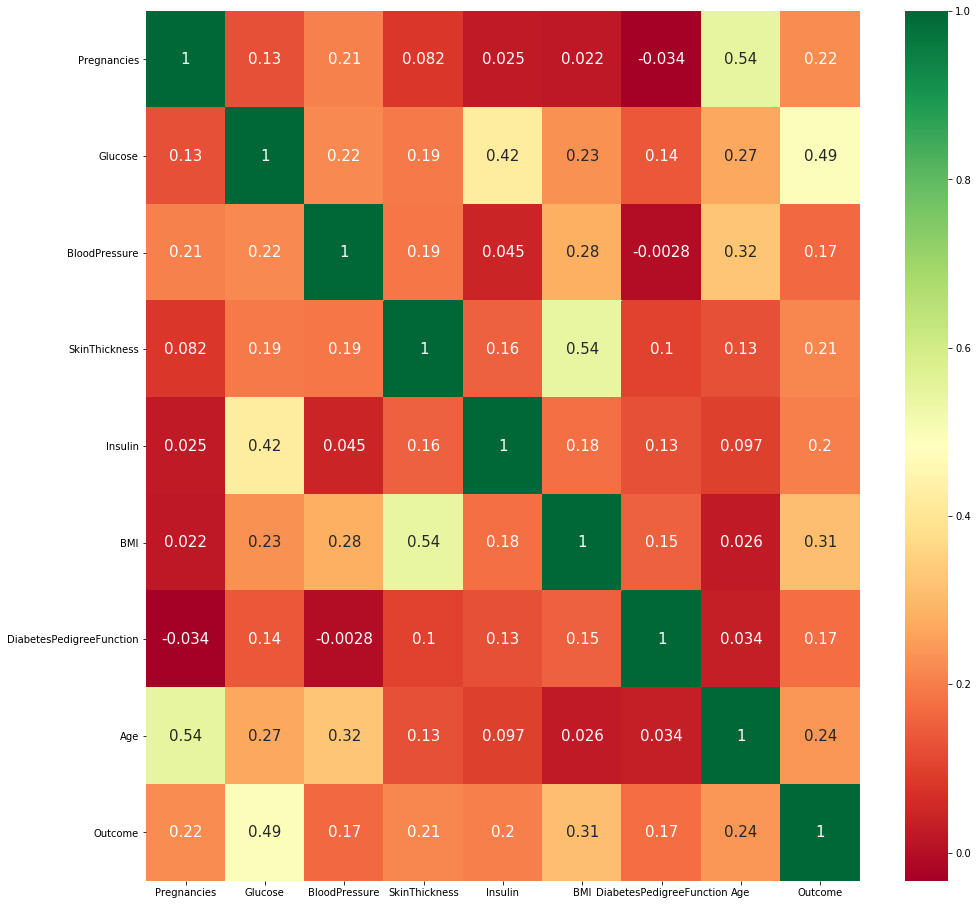

In [0]:
# For dataframe 1 with assumed missing values:

plt.figure(figsize=(16, 16))
sns.heatmap(df1.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

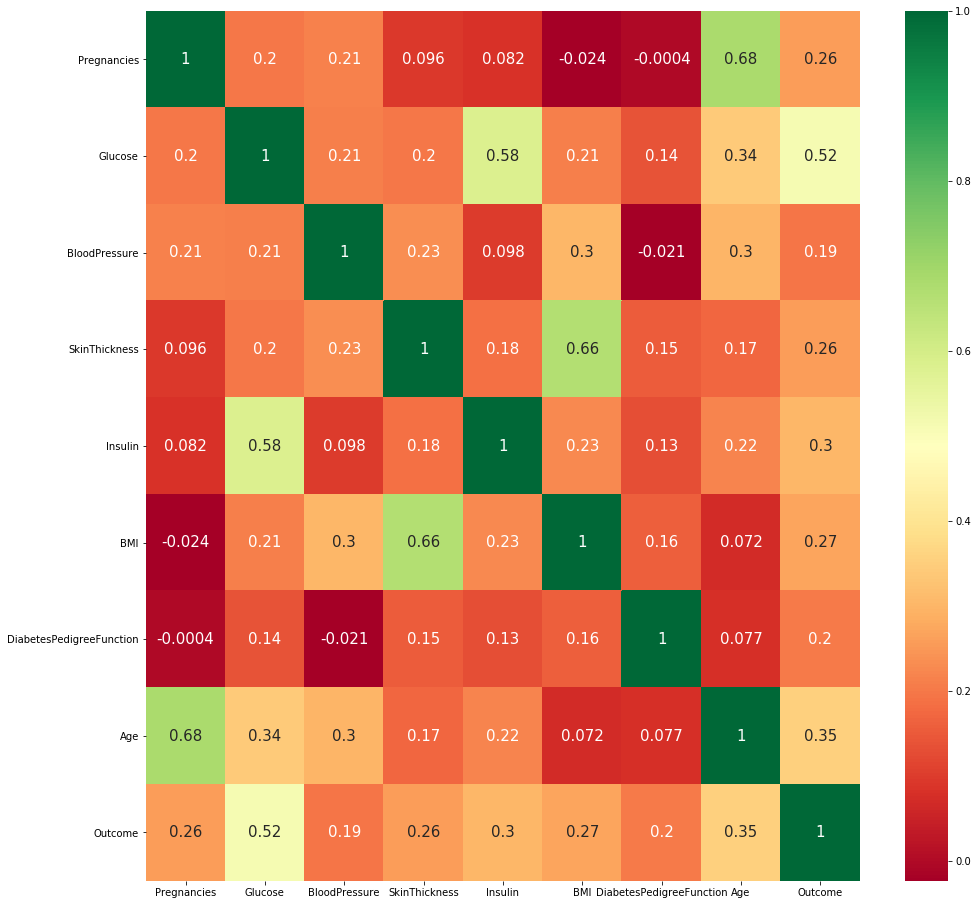

In [0]:
# For dataframe 2 without Insulin missing values:

plt.figure(figsize=(16, 16))
sns.heatmap(df2.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

From the correlation matrices, a few Clear correlations that are standing out are:

*  Glucose and Insulin seem to have a high correlation : 0.42 and 0.58
*  Body Mass Index and Skin Thcikness seem to have a high correlation: 0.54 and 0.66

Even though these correleations are high they are not very high so as to remove a single parameter from modelling.
Another observation is that:

*   The Diabetes outcome class depends highly on Glucose. This indicates a high variable importance of Glucose in modelling.



### Modelling for Df1 with treated missing values: 
**Train / Test Split with preserving outcome ratio using Stratify**


In [0]:
from sklearn.model_selection import train_test_split

train,test= train_test_split(df1,test_size=0.25,random_state=0,stratify=df1['Outcome'])# stratify the outcome

train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']

### Logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

m = LogisticRegression()
m.fit(train_X,train_Y)
p = m.predict(test_X)


In [0]:
# Results
print('The accuracy Score is:\n',metrics.accuracy_score(p,test_Y))

### Modelling for Dataset 2 (df2) with removed missing rows for Insulin:
**Train / Test Split with preserving outcome ratio using Stratify**

In [0]:
from sklearn.model_selection import train_test_split

train,test= train_test_split(df2,test_size=0.25,random_state=0,stratify=df2['Outcome'])# stratify the outcome

train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']

### Logistic Regression

In [0]:
m = LogisticRegression()
m.fit(train_X,train_Y)
p = m.predict(test_X)

# Accuracy Results
print('The accuracy Score is:\n',metrics.accuracy_score(p,test_Y))

The accuracy Score is:
 0.7070707070707071


### Selecting the appropriate data for Evaluation

Based on the model Accuracy scores on the two datasets: df1 and df2, we can clearly see that the accuracy in df1 is higher. This proves that even though we made certain assumptions about the missing values in our dataset, the predicitons performed better than case where we removed the rows with missing data. This is a possitive scenario as we can use our modelling on the entire dataset using -> df1




In [0]:
# Original data split

from sklearn.model_selection import train_test_split

train,test= train_test_split(df1,test_size=0.25,random_state=0,stratify=df1['Outcome'])# stratify the outcome

train_X=train[train.columns[:8]]
test_X=test[test.columns[:8]]
train_Y=train['Outcome']
test_Y=test['Outcome']


### Random Forest Model

In [0]:
# Random Forest Model

from sklearn.ensemble import RandomForestClassifier 
model= RandomForestClassifier(n_estimators=100,random_state=0)
model.fit(train_X,train_Y)
p = model.predict(test_X)

# Results
print('The accuracy Score is:\n',metrics.accuracy_score(p,test_Y))


The accuracy Score is:
 0.7708333333333334


The accuracy for both Logistic regression and Random Forest have been the same as 77%. We will try to imporve the model using a feature selection technique.

### Backward Selection Technique

###Step 1:
We will evaluate the Important features and remove the one with least importance and check our accuracy changes.

In [0]:
pd.Series(model.feature_importances_,index= train_X.columns).sort_values(ascending=False)

Glucose                     0.249622
BMI                         0.154760
Age                         0.143585
DiabetesPedigreeFunction    0.124671
Insulin                     0.085665
BloodPressure               0.083620
Pregnancies                 0.082484
SkinThickness               0.075593
dtype: float64

In [0]:
# RF on df1 without "SkinThickness"

# Train Test Split
train,test= train_test_split(df1[['Glucose','BMI','Age', 'DiabetesPedigreeFunction', 'Insulin', 'BloodPressure','Pregnancies','Outcome']],test_size=0.25,random_state=0,stratify=df1['Outcome'])# stratify the outcome

train_X=train[train.columns[:7]]
test_X=test[test.columns[:7]]
train_Y=train['Outcome']
test_Y=test['Outcome']

# Random Forest Model
model1= RandomForestClassifier(n_estimators=100,random_state=0)
model1.fit(train_X,train_Y)
p1 = model1.predict(test_X)

# Accuracy Results
print('The accuracy Score is:\n',metrics.accuracy_score(p1,test_Y))

The accuracy Score is:
 0.78125

 
 The confusion matrix: 
 [[110  27]
 [ 15  40]]


 The metrics classification report:
                precision    recall  f1-score   support

           0       0.88      0.80      0.84       137
           1       0.60      0.73      0.66        55

    accuracy                           0.78       192
   macro avg       0.74      0.77      0.75       192
weighted avg       0.80      0.78      0.79       192



###Step 2:
We can see that the model accuracy has improved when we remove "Skin Thickness" parameter. Now, we would remove the next least important parameter and check the model accuracy.

In [0]:
pd.Series(model.feature_importances_,index= train_X.columns).sort_values(ascending=False)

Glucose                     0.258335
BMI                         0.178377
Age                         0.155237
DiabetesPedigreeFunction    0.135200
Insulin                     0.095983
BloodPressure               0.093286
Pregnancies                 0.083582
dtype: float64

In [0]:
# RF on df1 without "SkinThickness" and "Pregnancies"

# Train Test Split
train,test= train_test_split(df1[['Glucose','BMI','Age', 'DiabetesPedigreeFunction', 'Insulin', 'BloodPressure','Outcome']],test_size=0.25,random_state=0,stratify=df1['Outcome'])# stratify the outcome

train_X=train[train.columns[:6]]
test_X=test[test.columns[:6]]
train_Y=train['Outcome']
test_Y=test['Outcome']

# Random Forest Model
model2= RandomForestClassifier(n_estimators=100,random_state=0)
model2.fit(train_X,train_Y)
p2 = model2.predict(test_X)

# Accuracy Results
print('The accuracy Score is:\n',metrics.accuracy_score(p2,test_Y))


The accuracy Score is:
 0.7708333333333334


### Step 3: Stop
Since we realise that after removing pregnanices as a parameter, our model accuracy drops back to 77%. That means the parameter is still important for an accuracy measurement. If we are interested in a less complex model we could chose to remove this parameter but for now, we will use the model without "SkinThickness" which gives us the highest accuracy.

### Model Results (Evaluation metrics)


In [0]:
# Accuracy Results
print('The accuracy Score is:\n',metrics.accuracy_score(p1,test_Y))
print('\n \n The confusion matrix: \n', metrics.confusion_matrix(p1, test_Y))
print('\n\n The metrics classification report:\n ', metrics.classification_report(p1, test_Y))

The accuracy Score is:
 0.78125

 
 The confusion matrix: 
 [[110  27]
 [ 15  40]]


 The metrics classification report:
                precision    recall  f1-score   support

           0       0.88      0.80      0.84       137
           1       0.60      0.73      0.66        55

    accuracy                           0.78       192
   macro avg       0.74      0.77      0.75       192
weighted avg       0.80      0.78      0.79       192



In [0]:
# Calculating AUC

prob = model1.predict_proba(test_X)

# Using possitive porbability for AUC
prob = prob[:, 1]

#AUC
auc = metrics.roc_auc_score(test_Y, prob)
print('AUC: %.2f' % auc)


AUC: 0.84


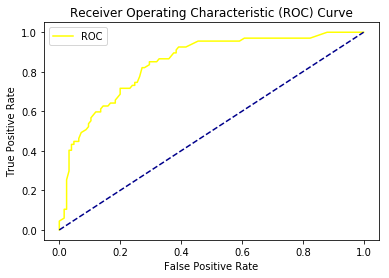

In [0]:
# Define ROC Curve

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='yellow', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


fpr, tpr, thresholds = metrics.roc_curve(test_Y, prob)
plot_roc_curve(fpr, tpr)

Here, we can see that the Final model has an ***Accuracy*** of 0.781. It has an***Area Under the Curve*** of 0.84.

The confusion matrix above shows how the model correctly interprets 110 true negatives while missing out on 27 and correctly predicts 40 true possitves while missing out on 15.

The model's ROC Curve shows the trade-off between the true positive rate and false positive rate in the random Forest Model.


### Conclusion

Diabetes is a serious disease in our society. It is very common in developing nations. In India, it is said that nearly 7% of the adult populaiton has diabetes and it is commonly found in my family as well. A Machine learning model, if used in the right manner could help in detecting symptoms that lead up to Diabetes. This could have tremendous health and cost benefits to the users. 

From our Model we are able to predict with Diabetes with 78% accuracy. It is also important to note that the 2 most important factors while detecting diabetes are:

1. Glucose
2. Body Mass Index


### Ethics

With every technical application especially in healthcare, there cousl be a downside as well. Such predicitve models hsould be handled with ethical responsibility. Certain companies make a business out of targeting people with susceptible to diseases with predicitive modelling informaiton. Such practices must be avoided for the betterment of the society. 

### References

1. https://www.kaggle.com/uciml/pima-indians-diabetes-database

2. https://stackabuse.com/understanding-roc-curves-with-python/

3. https://machinelearningmastery.com/